<a href="https://www.kaggle.com/code/lostinworlds/clusters-in-goodreads-reading-list?scriptVersionId=95825177" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
In a world where there are countless books and it is near impossible for any one individual to read all of them, reading lists are a common feature. Goodreads, a site specialised in servicing readers, has a myriad of reading lists curated by users. Some of these lists recommend others over 1000 books. However are there any patterns to such lists? 

# Overview
Some lists on Goodreads are self explanatory, classifying books by themes or genre. However lists such as ["Books That Everyone Should Read At Least Once"](https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1), can be more broad.  The list has over 26,000 books with a simple description "Books that encourage thought". 
As these lists are online, the data will need to be scrapped before methods such as KMeans clustering can be applied to understand patterns in the data. 

# Web scraping

As the list is online and the Goodreads API is currently phased out, the data was scraped. 
Using a modified version of the code from [mee-kell](https://github.com/mee-kell/web-scraper/blob/master/web-scraper.py), the relevant data was scraped. 

In [1]:
# library for data handling
import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px

#
from sklearn.cluster import KMeans
from sklearn import preprocessing


/kaggle/input/goodreads-reading-list/Books_That_Everyone_Should_Read_At_Least_Once1.csv


In [2]:
df = pd.read_csv("/kaggle/input/goodreads-reading-list/Books_That_Everyone_Should_Read_At_Least_Once1.csv", index_col = False)

The initial copy of the data is as follows:

In [3]:
df.head()

,title,author,avg_rating,total_ratings
0,To Kill a Mockingbird,Harper Lee,4.27,"5,260,972"
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.48,"8,496,025"
2,Pride and Prejudice,Jane Austen,4.28,"3,595,947"
3,The Diary of a Young Girl,Anne Frank,4.17,"3,236,081"
4,Animal Farm,George Orwell,3.97,"3,260,451"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          4900 non-null   object
 1   author         4900 non-null   object
 2   avg_rating     4900 non-null   object
 3   total_ratings  4900 non-null   object
dtypes: object(4)
memory usage: 153.2+ KB


I am unsure of the cause but for a few books, some vales are scrapped incorrectly/ contain errors. However after scrapping 49 pages with information on 4900 books, the dropping rows with errors should not cause major issues.

In [5]:
# check data in avg_Ratings
df["avg_rating"].unique()

array(['4.27', '4.48', '4.28', '4.17', '3.97', '4.19', '4.32', '3.93',
       '3.81', '4.51', '4.38', '4.14', '4.26', '3.69', '3.75', '4.62',
       '4.13', '4.37', '4.12', '3.88', '3.98', '4.30', '4.58', '4.06',
       '4.10', '4.35', '4.57', '4.42', '4.22', '4.03', '3.82', '3.90',
       '4.24', '4.46', '4.23', '3.79', '4.07', '4.11', '4.25', '4.40',
       '3.99', '4.31', '3.92', '3.86', '4.20', '3.84', '4.34', '4.09',
       '3.43', '3.63', '4.05', 'really', '4.29', '4.43', '4.02', '3.89',
       '4.08', '3.52', '4.01', '4.16', '4.33', '4.39', '4.18', '4.36',
       '4.45', '4.44', '4.15', '3.83', '3.96', '4.55', '3.95', '3.85',
       '3.87', '3.60', '4.49', '3.62', '4.60', '3.58', '3.78', '3.68',
       '3.77', '3.91', '4.52', '3.66', '4.64', '4.21', '4.95', '4.04',
       '3.71', '3.59', '3.80', '3.74', '3.72', '3.76', '3.64', '4.50',
       '3.57', '4.47', '4.41', '3.55', '3.54', '3.46', '3.67', '4.59',
       '3.94', '3.51', '4.73', '3.70', '4.54', '3.42', '3.50', '3.61',
    

In [6]:
# remove rows with errors
df.drop(df[df["avg_rating"]=="really"].index, axis =0, inplace = True)
df.drop(df[df["avg_rating"]=="it"].index, axis =0, inplace = True)
df.drop(df[df["avg_rating"]=="liked"].index, axis =0, inplace = True)


# Evaluating the data

In addition, to the dropping some of the errors, further alternations are required to the data. For example, the numerical fields need to be reformatted. Furthermore, as books are added to the list by the users, duplicated titles should be checked and removed. 

After such alterations the dataset of over 4700 books remain. 


In [7]:
# reformat numerical values
df["avg_rating"] = df["avg_rating"].str.replace(",","").astype(float)
df["total_ratings"] = df["total_ratings"].str.replace(",","").astype(int)

In [8]:
# check if titles are repeated
df["title"].value_counts()

The Hunger Games (The Hunger Games #1)                3
Females of Valor (The Viking's Kurdish Love #2)       2
A Monster Calls                                       2
The Girl with the Dragon Tattoo (Millennium #1)       2
For the Love of Armin                                 2
                                                     ..
Ghost Park (Devil Barnett Detective Series Book 9)    1
Cold Comfort Farm                                     1
Understanding Power: The Indispensable Chomsky        1
Frankie the Ferret                                    1
Heart of Darfur                                       1
Name: title, Length: 4774, dtype: int64

In [9]:
# remove duplicated titles
df.drop_duplicates(subset="title", keep='first', inplace = True)

In [10]:
# check revised data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 0 to 4899
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4774 non-null   object 
 1   author         4774 non-null   object 
 2   avg_rating     4774 non-null   float64
 3   total_ratings  4774 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 186.5+ KB


For those unaware, the rating system used on Goodreads, enables users to select an integers between 1 and 5. Averaged out these values become floats. 

In [11]:
# examine distribution of numerical data
df.describe()

,avg_rating,total_ratings
count,4774.000000,4.774000e+03
mean,4.053680,1.398888e+05
std,0.277272,3.769357e+05
min,0.000000,0.000000e+00
25%,3.880000,7.502000e+03
50%,4.070000,3.857850e+04
75%,4.240000,1.191798e+05
max,4.950000,8.496025e+06


Whilst this is not the central aspect of the dataset, a review of the authors indicate that some individuals such as Stephen King and William Shakespeare are referenced significantly more than other authors, some of whom only appear once on the list. 

In [12]:
# view top 5 popular authors
df["author"].value_counts().head()

Stephen King           52
William Shakespeare    30
Terry Pratchett        20
C.S. Lewis             20
Anonymous              18
Name: author, dtype: int64

In [13]:
#plot distribution authors
fig = px.histogram(df, x = "author", 
            title = "Distribution of Authors in Reading list <br><sup>Data from \"Books that everyone should read at least once\"</sup>")

#format graph
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -3
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')


fig.update_layout(
    margin=dict(l=15, r=15, t=30, b=20))

# Looking for clusters 

Examining the between the number of ratings and the average ratings does not appear to at face value to have clear groups. There is a distribution skewed in favour of higher ratings. This is reflective of the fact that reading lists tend to recommend books that others have found to be enjoyable. 

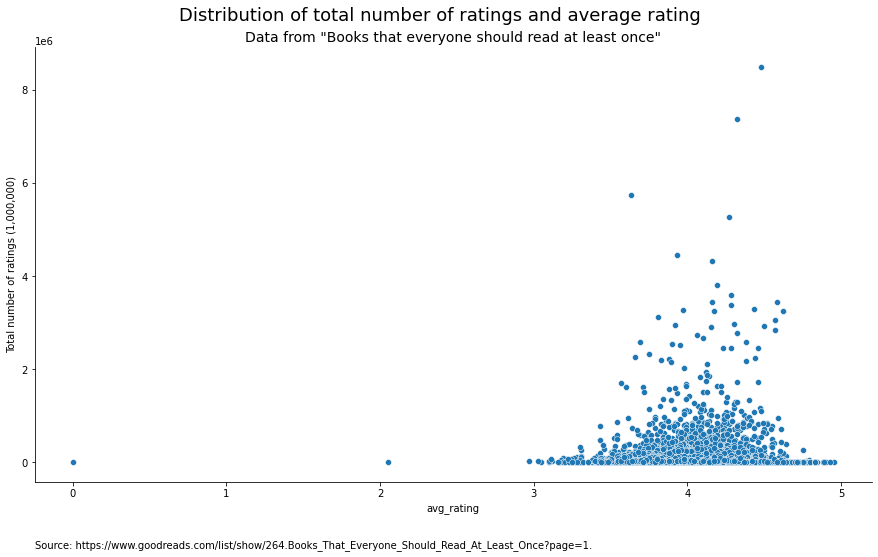

In [14]:
# plot relationship between total number and average ratings
plt.figure(figsize =(15,8))
sns.scatterplot(x ="avg_rating", y = "total_ratings", data = df)

# format graph
plt.suptitle("Distribution of total number of ratings and average rating", fontsize = 18, y =.95)
plt.title("Data from \"Books that everyone should read at least once\"", fontsize = 14)

plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.15), xycoords ='axes fraction' )
plt.ylabel("Total number of ratings (1,000,000)")

sns.despine(top = True, right = True, left = False, bottom = False)

In [15]:
# plot relationship between total number and average ratings (interactive)
fig = px.scatter( df, x ="avg_rating", y = "total_ratings",
           title = "Distribution of total number of ratings and average rating <br><sup>Data from \"Books that everyone should read at least once\"</sup>", 
                )

# format graph
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")

fig.update_traces(hovertemplate = 'Title=%{customdata[0]}<br>Author=%{customdata[1]}<extra></extra>')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

# First attempt

Performing a KMeans cluster analysis looking for 4, with no additional analysis, reveals the following. It seems that clusters identify differing levels of popularity (number of total ratings). However could the clusters be further improved?

In [16]:
# single out numerical variables
ratings = df[["avg_rating","total_ratings"]]

#create clusters
kmeans = KMeans(4)
kmeans.fit(ratings)

# check results
clusters = kmeans.fit_predict(ratings)
clusters[:5]

# add cluster data to dataframe
data_cluster = df.copy()
data_cluster["group"] = clusters

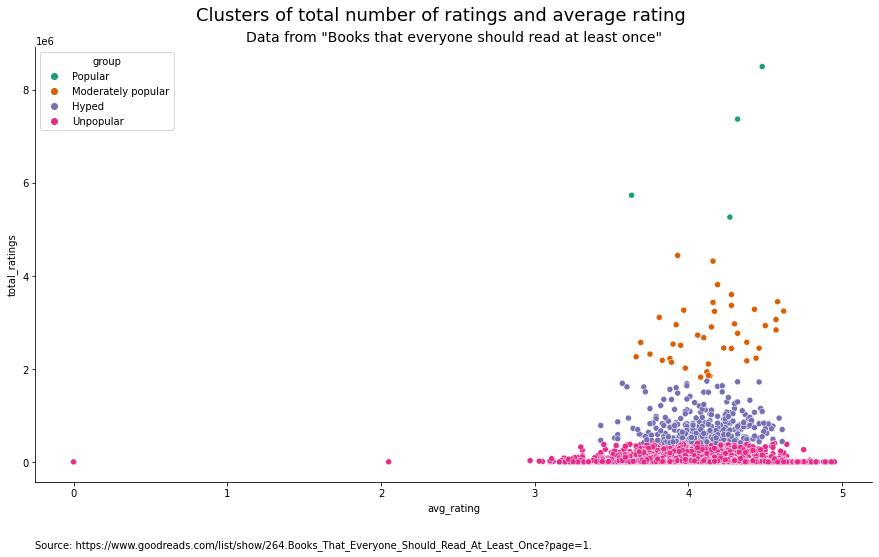

In [17]:
# rename groups
data_cluster['group'] = data_cluster['group'].replace([0,1,2,3],["Unpopular", "Moderately popular", "Hyped", "Popular"])

# create graph
plt.figure(figsize =(15,8))
sns.scatterplot(x ="avg_rating", y = "total_ratings", data = data_cluster,hue = "group", palette = "Dark2" )

# format graph
plt.suptitle("Clusters of total number of ratings and average rating", fontsize = 18, y =.95)
plt.title("Data from \"Books that everyone should read at least once\"", fontsize = 14)

plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.15), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

In [18]:
# create graph
fig = px.scatter( data_cluster, x ="avg_rating", y = "total_ratings", color =  "group",
           title = "Clusters of total number of ratings and average rating <br><sup>Data from \"Books that everyone should read at least once\"</sup>",
                 hover_data= ["title", "author"])

# format graph
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")


fig.update_traces(hovertemplate = 'Title=%{customdata[0]}<br>Author=%{customdata[1]}<extra></extra>')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

For example, there seems to be a book an obscure entry of a book, such as Wisdom Revolution by Misba which is neither popular no has a good review. This book, along with other outliers could be removed. 

In [19]:
# examining book with 0 ratings
df[df["total_ratings"]==0]

,title,author,avg_rating,total_ratings
1578,Wisdom Revolution (The Machinist The Monk And ...,Misba,0.0,0


In [20]:
# copy data
modified_df = df.copy()

# remove outliers
max = modified_df["total_ratings"].quantile(.95)
min = modified_df["total_ratings"].quantile(.05)

modified_df =modified_df[(modified_df["total_ratings"]<max) & (modified_df["total_ratings"]>min)]


max = modified_df["avg_rating"].quantile(.95)
min = modified_df["avg_rating"].quantile(.05)

modified_df =modified_df[(modified_df["avg_rating"]<max) & (modified_df["avg_rating"]>min)]

# Second attempt

Using the elbow method, a more effective number of clusters can be identified. In this case, it appears to be 3. However, as the units between total ratings and average ratings is extremely different, clusters still favour total ratings over the average rating. 

In [21]:
# isolate numerical values
modified_ratings = modified_df[["total_ratings","avg_rating"]]

In [22]:
# run WCSS 
wcss = []

for i in range (1, 10):
    kmeans = KMeans(i)
    kmeans.fit(modified_ratings)
    wcss_result = kmeans.inertia_
    wcss.append(wcss_result)

Text(0.5, 0.95, 'Graph of WCSS')

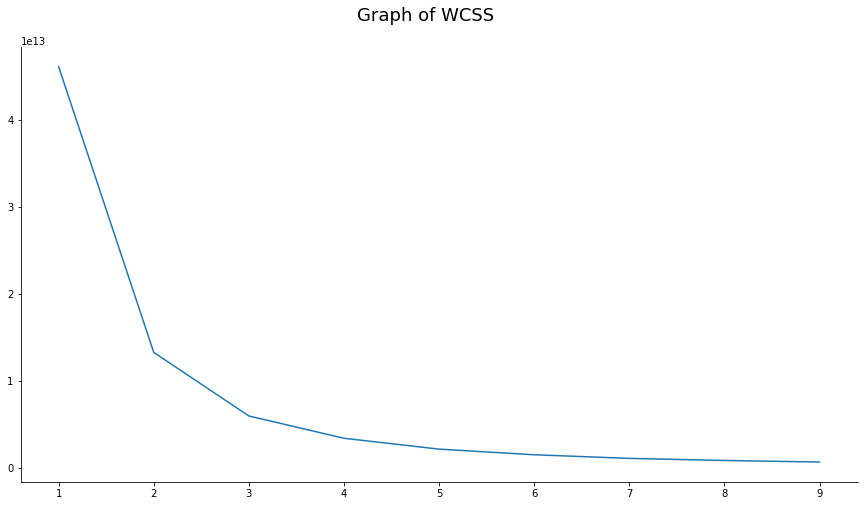

In [23]:
# plot WCSS values 
plt.figure(figsize =(15,8))
number_clusters = range (1,10)
plt.plot(number_clusters, wcss)

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Graph of WCSS", fontsize = 18, y =.95)

In [24]:
# run kmeans for 3 clusters
kmeans_new = KMeans(3)
kmeans_new.fit(modified_ratings)
cluster_new = modified_df.copy()
cluster_new["group"] = kmeans_new.predict(modified_ratings)

In [25]:
# rename clusters
cluster_new['group'] = cluster_new['group'].replace([0,1,2],["Unpopular", "Hyped", "Popular"])

# plot no. of ratings and average ratings with clusters
fig = px.scatter( cluster_new, y ="total_ratings", x = "avg_rating", color = "group",
                 title = "Clusters of total number of ratings and average rating <br><sup>Data of number of ratings and average ratings for books listed on \"Books that everyone should read at least once\" omitting outliers</sup>", 
                hover_data= ["title", "author"])

# format graph
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")


fig.update_traces(hovertemplate = 'Title=%{customdata[0]}<br>Author=%{customdata[1]}<extra></extra>')             
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

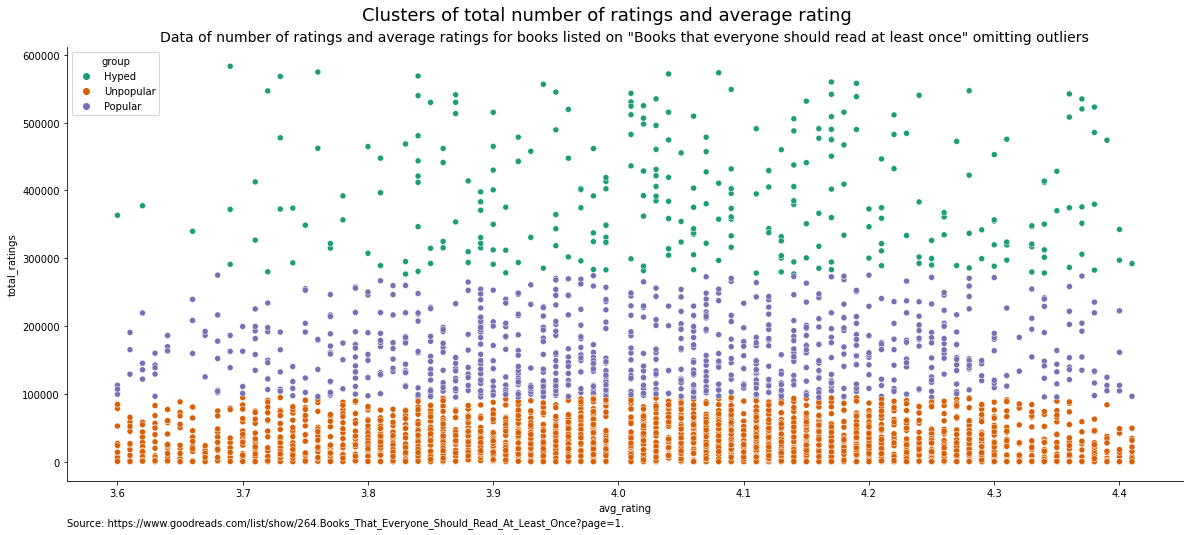

In [26]:
# plot no. of ratings and average ratings with clusters
plt.figure(figsize =(20,8))
sns.scatterplot(x ="avg_rating", y = "total_ratings", data = cluster_new,hue = "group", palette = "Dark2" )

# format graph
plt.suptitle("Clusters of total number of ratings and average rating", fontsize = 18, y =.95)
plt.title("Data of number of ratings and average ratings for books listed on \"Books that everyone should read at least once\" omitting outliers", fontsize = 14)

plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

# Thrid attempt

Therefore the two variables will need to be standardised. Doing so and reveals the following:
* Extremely popular/hyped books
* Books with high ratings.
* Books with low ratings.

Based on these clusters, for those who are new to reading may enjoy reading the hyped books. Such books typically have a plethora of supporting media and community to enhance the reading experience. 

Books with high ratings will be the books for those who read on a typical basis and wishes to discover new lesser known groups. 

The third groups, however, is more risky. Although the x axis is an average, the reader's enjoyment of the book may vary. Therefore the reader may be best served by checking reviews by individuals who share similar reading tastes before trying such books. It should be noted that even in this group the lowest ratings are 3.6 and therefore above the median which should be 2.5 based on the 1-5 rating system.  

In [27]:
# standadise data
modified_df["avg_rating_scaled"] = preprocessing.scale(modified_df["avg_rating"])
modified_df["total_ratings_scaled"]= preprocessing.scale(modified_df["total_ratings"])

In [28]:
# isolate numerical values
modified_values = modified_df[["avg_rating_scaled","total_ratings_scaled"]]

In [29]:
# run WCSS 
wcss = []

for i in range (1, 10):
    kmeans = KMeans(i)
    kmeans.fit(modified_values)
    wcss_result = kmeans.inertia_
    wcss.append(wcss_result)

Text(0.5, 0.95, 'Graph of wcss')

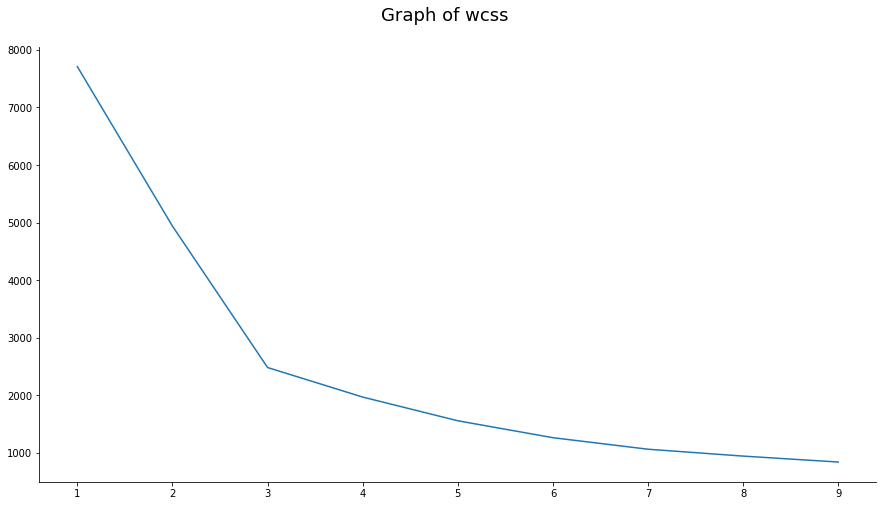

In [30]:
# plot WCSS values 

plt.figure(figsize =(15,8))
number_clusters = range (1,10)
plt.plot(number_clusters, wcss)

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Graph of wcss", fontsize = 18, y =.95)

In [31]:
# run kmeans for 3 clusters
kmeans_new = KMeans(3)
kmeans_new.fit(modified_values)
cluster_new = modified_df.copy()
cluster_new["group"] = kmeans_new.predict(modified_values)

In [32]:
# rename clusters
cluster_new['group'] = cluster_new['group'].replace([0,1,2],["Hyped books", "High ranking but not as popular books", "Not popular or high ranking books"])

# plot no. of ratings and average ratings (standardised) with clusters
fig = px.scatter( cluster_new,y ="total_ratings", x = "avg_rating", color =  "group", 
                 title = "Clusters of total number of ratings and average rating <br><sup>Standardised data of number of ratings and average ratings for books listed on \"Books that everyone should read at least once\"</sup>", 
                 hover_data= ["title", "author"])

# format graph
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")

fig.update_traces(hovertemplate = 'Title=%{customdata[0]}<br>Author=%{customdata[1]}<extra></extra>') 
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')


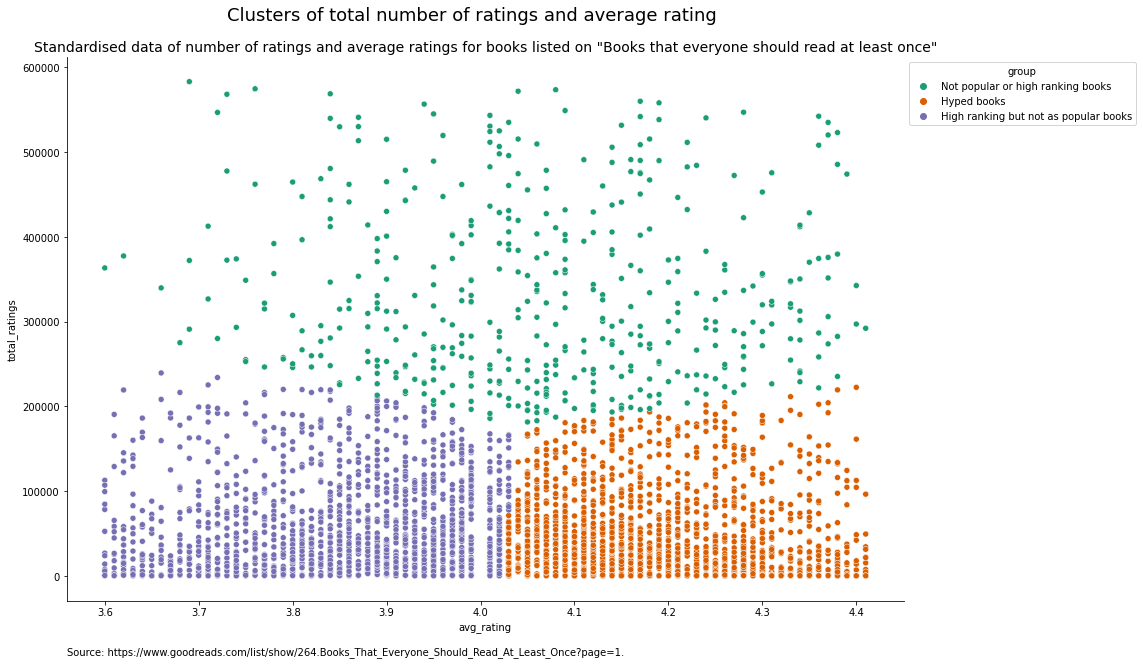

In [33]:
# plot no. of ratings and average ratings (standardised) with clusters
plt.figure(figsize =(15,10))
ax= sns.scatterplot(x ="avg_rating", y = "total_ratings", data = cluster_new,hue = "group", palette = "Dark2" )

# format graph
plt.suptitle("Clusters of total number of ratings and average rating", fontsize = 18, y =.95)
plt.title("Standardised data of number of ratings and average ratings for books listed on \"Books that everyone should read at least once\"", fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

# Conclusion
This was a short project examining Goodreads reading list, Books That Everyone Should Read At Least Once. Through a handful of attempts and modification, three clusters of books were identified. Books that are extremely popular. Books which weren't extremely popular but had relatively high average rating. Finally books which weren't as popular, though performed above the median based on Goodread's rating system. Given the list title, this is understandable. 

It should be noted that enjoyment from books is subjective and therefore regardless of popularity or average rating readers may have different experiences consuming the same book. 

Moreover it is highly likely that there will be additional patterns in this list of books. However to understand these aspects additional research and data mining will be required. 